# Assignment 3 - Generalization,  Model Selection and Beyond Linearity

# Instructions

This assignment is worth a total of **10 points**. The goal of this assignment is to introduce you to selecting the best model using K fold cross validation. You will also explore methods for selecting hyperparameters to enhance the generalizability of your trained models.

We have structured the assignment into three parts:

1. **Part One**: Generalization
2. **Part Two**: Model Selection
3. **Part Three**: Beyond Linearity

To ensure you understand how each package is used, libraries will be imported as and when needed. The libraries used are all open source, and if you do not have any of these libraries installed, you can install them using the `pip install` method, either via your terminal or within a code cell in this notebook. For example, in your code cell you can use:

`!pip install matplotlib`

# Part One: Generalization, <span style="color:green">total of 3 points </span> 


We will make use of the "make classification" from sklearn datasets

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Make Classification Datasets and Plot

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles
X, y = make_circles(n_samples=1000,factor=.25, noise=.30)

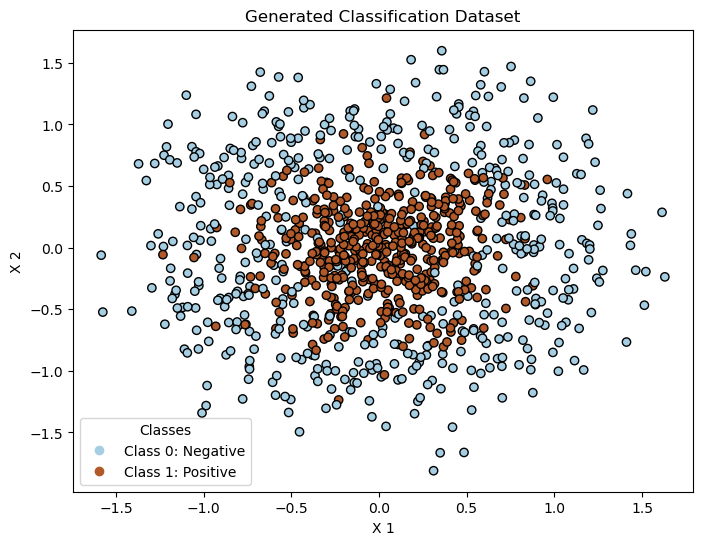

In [3]:
def plot_dataset(X, y, title="Dataset"):
    """
    Plots the dataset with different colors for each class and adds a legend.
    
    Parameters:
    X (array-like): Feature matrix.
    y (array-like): Target vector.
    title (str): Title of the plot.
    """
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel("X 1")
    plt.ylabel("X 2")
    
    # Create a legend
    handles, labels = scatter.legend_elements()
    legend_labels = ['Class 0: Negative', 'Class 1: Positive']
    plt.legend(handles, legend_labels, title="Classes")
    
    plt.show()
plot_dataset(X, y, title="Generated Classification Dataset")

### Kfold Cross validation:



### <span style="color:red"> Task 1: Implement a K-Fold cross-validation function as discussed in **Lecture 6** by filling in the parts of the code with TODOs. </span>

The kfold cross-validation metric is calculated as:

$$
CV_k = \frac{1}{k} \sum_{i=1}^{k} \text{Metric}_i
$$

The metrics we would use will be accuracy and the f1 score. We will use the inbuilt libraries for these metrics directly from sklearn.



#### <span style="color:green">Total: 1 point</span> 


In [62]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

def kfold_cross_validation(model, X, y, k=5, random_seed=0):
    """
    K-Fold cross-validation for a selected model.

    Parameters:
    model: The model you want to evaluate.
    X: The input features (numpy array or pandas DataFrame).
    y: The target variable (numpy array or pandas Series).
    k: Number of folds (default is 5).

    Returns: 
    Average metrics across the K folds.
    """
    np.random.seed(random_seed)
    n_samples = len(X)
    # Get the fold size by dividing the number of samples by k
    fold_size =  int(n_samples/k) #Ensure integer division
    
    indices = np.arange(n_samples)
    np.random.shuffle(indices)  # Shuffle indices for random sampling

    # Initialize lists to store accuracies and f1_scores
    accuracies = [] #Accuracy list
    f1_scores = [] #F1 score list

    for i in range(k):
        # Select the test and train indices
        a = i*fold_size 
        test_indices = list(range(a, a + fold_size)) # TODO: Define test indices
        train_indices =  list(range(0, a)) + list(range(a + fold_size, n_samples))# TODO: Define train indices
        
        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        # TODO: Model fitting on train
        # TODO: Use model to make Predictions on held out xtest
        
       
        accuracy =  accuracy_score(y_true= y, y_pred=y_pred)# TODO: Calculate accuracy and append to accuracies list
        f1 = f1_score(y_true= y, y_pred= y_pred)  # TODO: Calculate weighted F1 score and append to f1_scores list
        accuracies.append(accuracy)
        f1_scores.append(f1)
    return np.mean(accuracies), np.mean(f1_scores)
# TODO: Return average accuracy and F1 score 
   
    

### Model Fitting


### <span style="color:red">Task 2:  Fit 3 different models on your training data (i.e Logistic Regression, LDA, QDA) with your written 5-fold cross validation function above by filling in the parts of the code with TODO.</span>

#### <span style="color:green">Total: 1 point </span> 


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Instantiate your models
logistic_regression = #TODO
lda = #TODO
qda = #TODO

# Fit the models using k-fold cross-validation
lr_accuracy, lr_f1 = #TODO
lda_accuracy, lda_f1 = #TODO
qda_accuracy, qda_f1 = #TODO


print(f'Logistic Regression: Accuracy = {lr_accuracy:.2f}, F1 Score = {lr_f1:.2f}')
print(f'LDA: Accuracy = {lda_accuracy:.2f}, F1 Score = {lda_f1:.2f}')
print(f'QDA: Accuracy = {qda_accuracy:.2f}, F1 Score = {qda_f1:.2f}')

### Evaluating Model Performance with Varying K

### <span style="color:red">Task 2.1: Write a for loop over different values of k by completing the sections of the code with TODO. Based on the output of your code, which model is the best and at which value of k?

#### <span style="color:green">Total: 0.5 points </span> 


In [ ]:
# Define the range of k values
k_values = [5, 10, 15, 20, 25, 30]

# TODO:Initialize lists to store accuracy and f1 score of each model

# Perform cross-validation for each value of k
for k in k_values:
    lr_accuracy, lr_f1 = #TODO: Use written kfold_cross_validation  for the logistic regression model
    lda_accuracy, lda_f1 = #TODO:  Use written kfold_cross_validation  for the lda model
    qda_accuracy, qda_f1 = #TODO: Use written kfold_cross_validation  for the qda model
    
    lr_accuracies.append(lr_accuracy)
    lr_f1_scores.append(lr_f1)
    lda_accuracies.append(lda_accuracy)
    lda_f1_scores.append(lda_f1)
    qda_accuracies.append(qda_accuracy)
    qda_f1_scores.append(qda_f1)

# Plot the results
plt.figure(figsize=(14, 6))

# accuracy plot
plt.subplot(1, 2, 1)
# TODO: Plot the accuracy of each model

# F1 score plot
plt.subplot(1, 2, 2)
# TODO: Plot the F1 score of each model


plt.tight_layout()
plt.show()

### Decision Boundary Calculation



###  <span style="color:red">Task 3: Looking at the generated plots of the decision boundaries for the different models, can you write down what you observe </span>


#### <span style="color:green">Total: 0.5 point for explanation </span> 


In [ ]:
def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    ax.set_title(title)

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plot_decision_boundary(logistic_regression, X, y, axes[0], "Logistic Regression Decision Boundary")
plot_decision_boundary(lda, X, y, axes[1], "LDA Decision Boundary")
plot_decision_boundary(qda, X, y, axes[2], "QDA Decision Boundary")
plt.show()

# Part Two: Model Selection, <span style="color:green">total of 3 points </span> 

In this section, we will:

* Fit Lasso and Ridge regression models.
* How to select the optimal $\lambda$ for each model.
* Compare the performance of the two models using the optimal $\lambda$ values.

In [ ]:
import matplotlib.pyplot as plt

def plot_regression_dataset(X, y, title="Regression Dataset"):
    """
    Plots the regression dataset with a color gradient representing the target values.
    Parameters:
    X (array-like): Feature matrix.
    y (array-like): Target vector.
    title (str): Title of the plot.
    """
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
    plt.colorbar(label='Target Value')
    plt.title(title)
    plt.xlabel("X 1")
    plt.ylabel("X 2")
    
    plt.show()

### Datasets

In [ ]:
from sklearn.datasets import make_regression

X_regression, y_regression = make_regression(n_samples=1000, n_features=50, n_informative=15, noise=0.35, random_state=42)
plot_regression_dataset(X_regression, y_regression, title="Generated Regression Dataset")

### Lasso & Ridge Regression



### <span style="color:red">Task 4: Fill in the missing parts of the code to fit ridge and lasso regression using different lambda values. </span>



#### <span style="color:green">Total: 1 point </span> 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score


X_train, X_test, y_train, y_test = train_test_split(X_regression, y_regression, test_size=0.3, random_state=42)

# Define a range of lambda values
lambda_values = np.logspace(-4, 4, 100)
mse_ridge = []
mse_lasso = []

# Define K-Fold cross-validation - NOTE we using the inbuilt KFold here
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform K-Fold Cross-Validation for Ridge Regression
for lambda_val in lambda_values:
    # TODO: Fit a Ridge regression model with the current lambda value
    mse_scores = # TODO: Use cross_val_score with 'neg_mean_squared_error'
    mse_ridge.append(-mse_scores.mean())  # Negate to get positive MSE

# Perform K-Fold Cross-Validation for Lasso Regression
for lambda_val in lambda_values:
    # TODO: Fit a Lasso regression model with the current lambda value
    mse_scores = # TODO: Use cross_val_score with 'neg_mean_squared_error'
    mse_lasso.append(-mse_scores.mean())  # Negate to get positive MSE

# Plot MSE vs. Lambda for Ridge and Lasso Regression
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
# TODO: Plot the MSE for Ridge Regression (lambda values vs. mse_ridge)
# TODO: Plot the MSE for Lasso Regression (lambda values vs. mse_lasso)
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.title('Ridge vs. Lasso Regression: MSE vs. Lambda')
plt.legend()
plt.show()

# Choose the optimal lambda for each model
optimal_lambda_ridge = # TODO: Select the best lambda value for Ridge
optimal_lambda_lasso = # TODO: Select the best lambda value for Lasso
print(f'Optimal Lambda for Ridge Regression: {optimal_lambda_ridge:.3f}')
print(f'Optimal Lambda for Lasso Regression: {optimal_lambda_lasso:.3f}')




###  <span style="color:red">Task 5: Complete the code parts with TODOs and answer based on the output of your model, which model will you choose and why? </span>

Using the optimal lambda values obtained from cross-validation for both Ridge and Lasso regression, follow these steps:

* Fit the Ridge and Lasso regression on your train data using the selected optimal lambda values.
* Evaluate the performance of the models on the testing set.
* Between the two models, which will you choose and why? 


#### <span style="color:green">Total: 2 points </span> 


In [ ]:
from sklearn.metrics import mean_squared_error


# TODO: Fit Ridge Regression on train data with optimal lambda
y_pred_ridge = ridge.predict(X_test)
mse_ridge = #TODO: estimate the MSE

# TODO: Fit Lasso Regression train data with optimal lambda
y_pred_lasso = lasso.predict(X_test)
mse_lasso = #TODO: estimate the MSE

print(f"Lasso regression with lambda {optimal_lambda_lasso:.3f} has mse {mse_lasso:.3f} and ridge regression using lambda {optimal_lambda_ridge:.3f} has mse {mse_ridge:.3f}")

# Part Three: Beyond Linearity,  <span style="color:green">total of 4 points </span> 


### Generate Datasets

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
num_samples = 1000
X_splines = np.sort(np.random.rand(num_samples) * 10)
y_splines = np.sin(X_splines) + np.random.randn(num_samples) * 0.1

# Plot the synthetic data
plt.scatter(X_splines, y_splines, label='Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data')
plt.legend()
plt.show()


### Exploring Degrees Polynomial Regression


 ###  <span style="color:red">Task 6: Fit polynomial regresion using different degrees. Complete all parts indicating TODOs. Based on your output, which degree would you select as best and why? </span>


#### <span style="color:green">Total: 2 points </span> 



In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(12, 8)) 
degrees_range = [2, 4, 5, 6]

# Loop through different polynomial degrees
for j, degree in enumerate(degrees_range):
    poly_features = # TODO: Create polynomial transformer
    X_poly = # TODO: Transform the features to polynomial features
    
    # TODO: Fit the polynomial regression model
    
    # Predict the output
    y_poly_pred = poly_model.predict(X_poly)

    # Calculate the MSE for polynomial regression
    mse_poly = mean_squared_error(y_splines, y_poly_pred)

    # Plot the polynomial regression
    plt.subplot(2, 2, j + 1)  # 2 rows, 2 columns
    plt.scatter(X_splines, y_splines, label='Data', color='blue', alpha=0.5)
    plt.plot(X_splines, y_poly_pred, label=f'Polynomial Regression (degree={degree})', color='red')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Polynomial Regression (Degree={degree}) - MSE: {mse_poly:.3f}')
    plt.legend()
    plt.grid(True) 

# Adjust layout
plt.tight_layout()
plt.show()


### Exploring Degrees and Knots on Spline Regression

###  <span style="color:red">Task 7: Experiment with various degrees and knots. Here you will need to first complete the missing parts of the code. then answer the following questions based on your code output:</span>

* What observations can you make regarding the effect of varying knots?
* Which specific combination of knots and degrees would you select?

#### <span style="color:green">Total: 2 points </span> 



In [ ]:
from sklearn.preprocessing import SplineTransformer
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(15, 10))
knots_range = [2, 3, 4, 10]
degrees_range = [2, 3, 10]
results = []
# Loop through different numbers of knots and degrees
for i, n_knots in enumerate(knots_range):
    for j, degree in enumerate(degrees_range):
        spline_transformer =   # TODO: Create a spline transformer
        spline_model = # TODO: Create linear regression pipeline

        # TODO: Fit the spline regression model
        
        y_spline_pred = spline_model.predict(X_splines.reshape(-1, 1))
        mse_spline = mean_squared_error(y_splines, y_spline_pred)
        
        # TODO:  Append knots, degree, and mse to results

        plt.subplot(len(knots_range), len(degrees_range), i * len(degrees_range) + (j + 1))
        plt.scatter(X_splines, y_splines, label='Data', color='blue')
        plt.plot(X_splines, y_spline_pred, label=f'Spline (knots={n_knots}, degree={degree})', color='red')
        
        plt.xlabel('X')
        plt.ylabel('y')
        plt.title(f'Knots={n_knots}, Degree={degree} - MSE {mse_spline:.3f}')

plt.tight_layout()
plt.show()

<p style="text-align: center;">


# That is it for this assignment, we do hope you learn something from this exercise!
</p>